In [19]:
# H1 OMC (toy model)

In [20]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy.signal as sig

In [21]:
# Initial Koji measurment (T1500060)
FSR = 261710000
TMS_pitch = .218827*FSR
TMS_yaw = .219221*FSR
gp_pitch = 2*np.pi*TMS_pitch
gp_yaw = 2*np.pi*TMS_yaw
fines = 375.7
fines_err = .3

In [60]:
# frequency vector 
freq = np.arange(.75*FSR, 2.5*FSR, 1.5*FSR/100000)
norm_freq = [i-FSR for i in freq]

In [44]:
# Power resonating in the cavity
def P_circ(nu, fines, fsr, P_max=1): 
    P = P_max/((1 +pow((2.0*fines/np.pi),2)*pow(np.sin((np.pi*nu)/fsr),2)))
    return P

In [45]:
o_n = 1
P = [P_circ(i, fines, FSR) for i in freq] 
P_HOM_pitch_1 = [P_circ(i, fines, FSR + 1*TMS_pitch) for i in freq]
P_HOM_yaw_1 = [P_circ(i, fines, FSR + 1*TMS_yaw) for i in freq]
P_HOM_pitch_2 = [P_circ(i, fines, FSR + 2*TMS_pitch) for i in freq]
P_HOM_yaw_2 = [P_circ(i, fines, FSR + 2*TMS_yaw) for i in freq]
P_HOM_pitch_3 = [P_circ(i, fines, FSR + 3*TMS_pitch) for i in freq]
P_HOM_yaw_3 = [P_circ(i, fines, FSR + 3*TMS_yaw) for i in freq]
P_HOM_pitch_4 = [P_circ(i, fines, FSR + 4*TMS_pitch) for i in freq]
P_HOM_yaw_4 = [P_circ(i, fines, FSR + 4*TMS_yaw) for i in freq]
P_HOM_pitch_5 = [P_circ(i, fines, FSR + 5*TMS_pitch) for i in freq]
P_HOM_yaw_5 = [P_circ(i, fines, FSR + 5*TMS_yaw) for i in freq]
P_HOM_pitch_6 = [P_circ(i, fines, FSR + 6*TMS_pitch) for i in freq]
P_HOM_yaw_6 = [P_circ(i, fines, FSR + 6*TMS_yaw) for i in freq]

In [56]:
# establishing sidebands
P_9MHz = [P_circ(i, fines, FSR + 9.1002293e6) for i in freq]
P_45MHz = [P_circ(i, fines, FSR + 9.1002293e6*5) for i in freq]
P_neg_9MHz = [P_circ(i, fines, FSR - 9.1002293e6) for i in freq]
P_neg_45MHz = [P_circ(i, fines, FSR - 9.1002293e6*5) for i in freq]

In [51]:
max_ind_pitch = sig.find_peaks(P_HOM_pitch)[0][0]
max_ind_yaw = sig.find_peaks(P_HOM_yaw)[0][0]

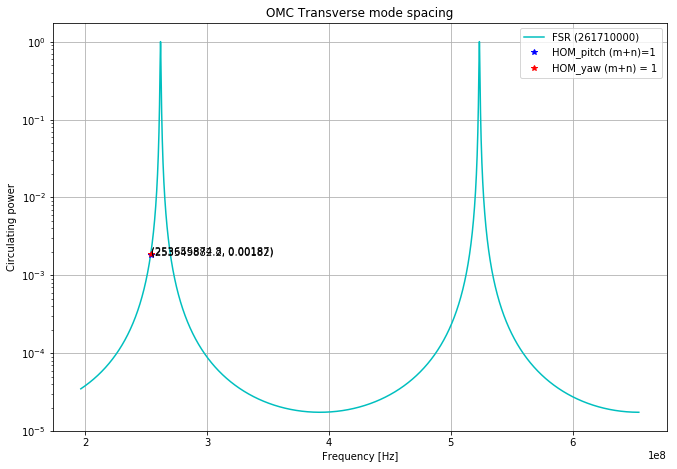

In [52]:
f = plt.figure(figsize=(11,7.5))
plt.semilogy(freq,P,'c')
#plt.semilogy(freq,P_HOM_cold,'r')
plt.semilogy(freq[max_ind_pitch],P[max_ind_pitch],'b*')
plt.semilogy(freq[max_ind_yaw], P[max_ind_yaw], 'r*')
plt.annotate('({}, {})'.format(round(freq[max_ind_pitch],1),round(P[max_ind_pitch],5)), xy=(freq[max_ind_pitch],P[max_ind_pitch]))
plt.annotate('({}, {})'.format(round(freq[max_ind_yaw],1),round(P[max_ind_yaw],5)), xy=(freq[max_ind_yaw],P[max_ind_yaw]))
plt.title('OMC Transverse mode spacing')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Circulating power')

plt.legend(('FSR ({})'.format(FSR), 'HOM_pitch (m+n)={}'.format(o_n), 'HOM_yaw (m+n) = {}'.format(o_n)), loc='best')

plt.grid()
plt.show()

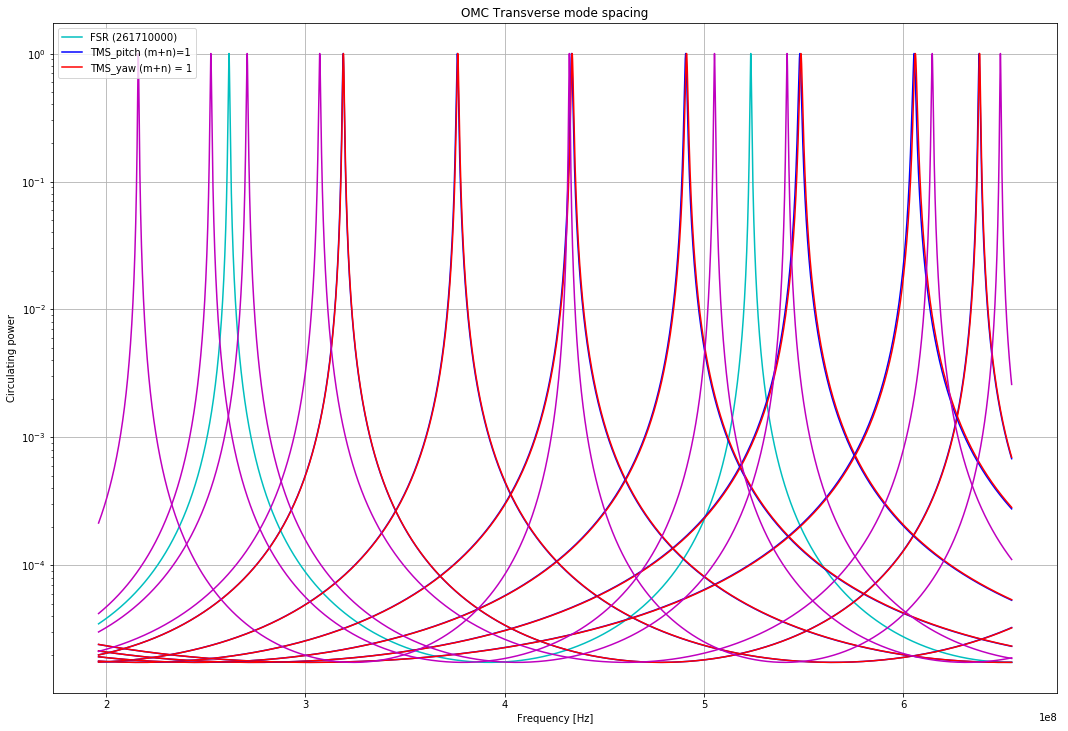

In [59]:
f = plt.figure(figsize=(18,12.32))
plt.semilogy(freq,P,'c')
plt.semilogy(freq,P_HOM_pitch_1,'b')
plt.semilogy(freq, P_HOM_yaw_1, 'r')
plt.semilogy(freq,P_HOM_pitch_2,'b')
plt.semilogy(freq, P_HOM_yaw_2, 'r')
plt.semilogy(freq,P_HOM_pitch_3,'b')
plt.semilogy(freq, P_HOM_yaw_3, 'r')
plt.semilogy(freq,P_HOM_pitch_4,'b')
plt.semilogy(freq, P_HOM_yaw_4, 'r')
plt.semilogy(freq,P_HOM_pitch_5,'b')
plt.semilogy(freq, P_HOM_yaw_5, 'r')
plt.semilogy(freq,P_HOM_pitch_6,'b')
plt.semilogy(freq, P_HOM_yaw_6, 'r')
plt.semilogy(freq,P_9MHz, 'm')
plt.semilogy(freq,P_45MHz, 'm')
plt.semilogy(freq,P_neg_9MHz, 'm')
plt.semilogy(freq,P_neg_45MHz, 'm')
#plt.annotate('({}, {})'.format(round(freq[max_ind_pitch],1),round(P[max_ind_pitch],5)), xy=(freq[max_ind_pitch],P[max_ind_pitch]))
#plt.annotate('({}, {})'.format(round(freq[max_ind_yaw],1),round(P[max_ind_yaw],5)), xy=(freq[max_ind_yaw],P[max_ind_yaw]))
plt.title('OMC Transverse mode spacing')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Circulating power')

plt.legend(('FSR ({})'.format(FSR), 'TMS_pitch (m+n)={}'.format(o_n), 'TMS_yaw (m+n) = {}'.format(o_n)), loc='best')

plt.grid()
plt.show()

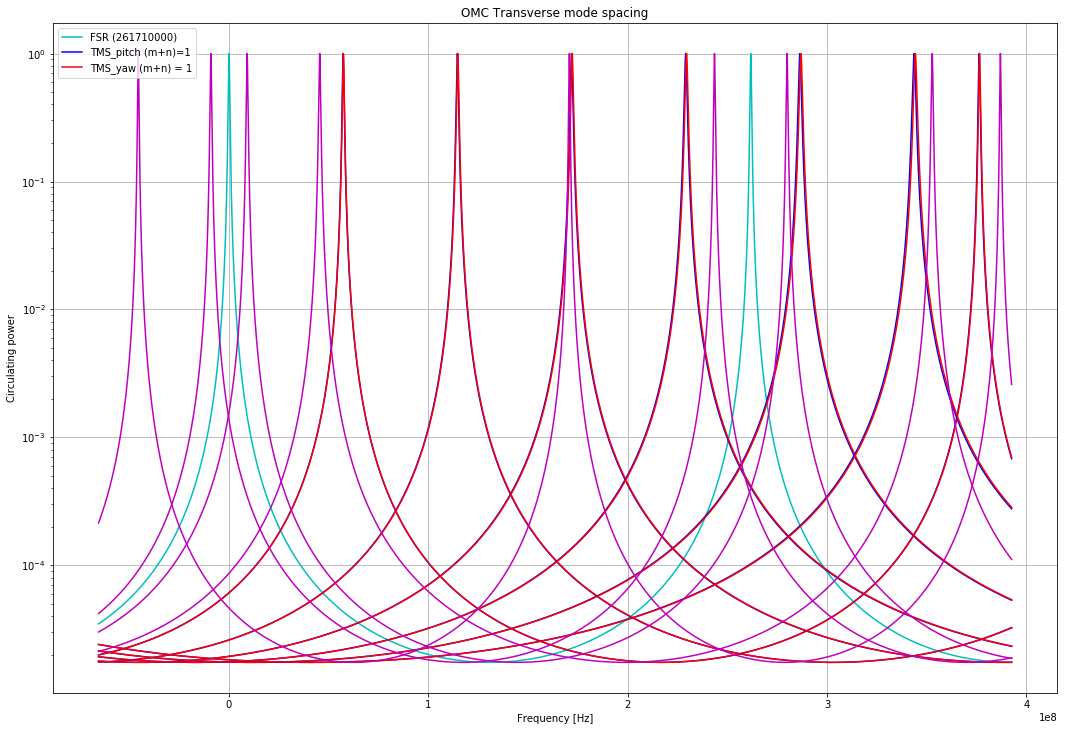

In [61]:
f = plt.figure(figsize=(18,12.32))
plt.semilogy(norm_freq,P,'c')
plt.semilogy(norm_freq,P_HOM_pitch_1,'b')
plt.semilogy(norm_freq, P_HOM_yaw_1, 'r')
plt.semilogy(norm_freq,P_HOM_pitch_2,'b')
plt.semilogy(norm_freq, P_HOM_yaw_2, 'r')
plt.semilogy(norm_freq,P_HOM_pitch_3,'b')
plt.semilogy(norm_freq, P_HOM_yaw_3, 'r')
plt.semilogy(norm_freq,P_HOM_pitch_4,'b')
plt.semilogy(norm_freq, P_HOM_yaw_4, 'r')
plt.semilogy(norm_freq,P_HOM_pitch_5,'b')
plt.semilogy(norm_freq, P_HOM_yaw_5, 'r')
plt.semilogy(norm_freq,P_HOM_pitch_6,'b')
plt.semilogy(norm_freq, P_HOM_yaw_6, 'r')
plt.semilogy(norm_freq,P_9MHz, 'm')
plt.semilogy(norm_freq,P_45MHz, 'm')
plt.semilogy(norm_freq,P_neg_9MHz, 'm')
plt.semilogy(norm_freq,P_neg_45MHz, 'm')
#plt.annotate('({}, {})'.format(round(freq[max_ind_pitch],1),round(P[max_ind_pitch],5)), xy=(freq[max_ind_pitch],P[max_ind_pitch]))
#plt.annotate('({}, {})'.format(round(freq[max_ind_yaw],1),round(P[max_ind_yaw],5)), xy=(freq[max_ind_yaw],P[max_ind_yaw]))
plt.title('OMC Transverse mode spacing')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Circulating power')

plt.legend(('FSR ({})'.format(FSR), 'TMS_pitch (m+n)={}'.format(o_n), 'TMS_yaw (m+n) = {}'.format(o_n)), loc='best')

plt.grid()
plt.show()

Some notes:

Maybe this is decent in determining the frequency spacing. Still feel like there are some "gotchas" that I am missing

How to properly model the PZT1 and PZT2 nonlinearity so we can properly select peaks.

There is the beam eigenbasis and the cavity eigenbasis.... what perspective is the best?
We know that whatever optical fields are entering the OMC are fixed in frequency... but how the OMC measures them changes with the PZT voltage.

We know that changing the PZT shifts the OMC cavity eigenfrequency... it does not do so linearly....
all that should matter is how the spacing is between the 45MHz and the 9MHz

Let's take a look at an old OMC scan